In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Обмеження виділення пам'яті на GPU до 4 ГБ
    tf.config.set_logical_device_configuration(
      gpus[0],
      [tf.config.LogicalDeviceConfiguration(memory_limit=4048)]
    )
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

# Задаємо шлях до тренувального набору даних
train_data_dir = '/tmp/train'
test_data_dir = '/tmp/test1'

# Створення списків для зображень та міток
images = []
labels = []

# Проходження крізь файли
for file in os.listdir(train_data_dir):
    if file.startswith('cat.'):  # Якщо зображення кота
        images.append(os.path.join(train_data_dir, file))
        labels.append('0')  # Мітка 0 для котів (у рядковому форматі)
    elif file.startswith('dog.'):  # Якщо зображення собаки
        images.append(os.path.join(train_data_dir, file))
        labels.append('1')  # Мітка 1 для собак (у рядковому форматі)

# Створення датафрейму зі списками зображень та міток
data = pd.DataFrame({'image_path': images, 'label': labels})

# Створення генератора зображень для тренування
train_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження та підготовка тренувального набору
train_generator = train_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

device = tf.config.list_physical_devices('GPU')[0]
tf.config.set_visible_devices(device, 'GPU')

# Визначення архітектури моделі
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компіляція моделі
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

# Навчання моделі
model.fit(train_generator, epochs=10)

2023-05-19 21:22:57.207255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 21:23:00.313407: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-19 21:23:00.340950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-19 21:23:00.341221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been bu

1 Physical GPUs, 1 Logical GPUs
Found 25000 validated image filenames belonging to 2 classes.


2023-05-19 21:23:02.987301: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.


Epoch 1/10


2023-05-19 21:23:03.063235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-19 21:23:03.984157: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.
2023-05-19 21:23:04.152650: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.
2023-05-19 21:23:05.798024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-19 21:23:07.900520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-19 21:23:08.546122: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f2

  3/391 [..............................] - ETA: 45s - loss: 1.1613 - accuracy: 0.4948   

2023-05-19 21:23:13.149187: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.
2023-05-19 21:23:13.287292: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.


391/391 [==============================] - 59s 126ms/step - loss: 0.6397 - accuracy: 0.6188
Epoch 2/10
391/391 [==============================] - 49s 124ms/step - loss: 0.5165 - accuracy: 0.7417
Epoch 3/10
391/391 [==============================] - 49s 124ms/step - loss: 0.4325 - accuracy: 0.7962
Epoch 4/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3577 - accuracy: 0.8413
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 0.2910 - accuracy: 0.8749
Epoch 6/10
391/391 [==============================] - 47s 121ms/step - loss: 0.2158 - accuracy: 0.9119
Epoch 7/10
391/391 [==============================] - 48s 122ms/step - loss: 0.1413 - accuracy: 0.9433
Epoch 8/10
391/391 [==============================] - 47s 119ms/step - loss: 0.0846 - accuracy: 0.9688
Epoch 9/10
391/391 [==============================] - 46s 117ms/step - loss: 0.0552 - accuracy: 0.9812
Epoch 10/10
391/391 [==============================] - 46s 119ms/step - loss: 0.0403

In [3]:
import glob

file_count = len([name for name in os.listdir(test_data_dir) if os.path.isfile(os.path.join(test_data_dir, name))])
# Створення списку файлів зображень в папці test_data_dir
image_files = glob.glob(os.path.join(test_data_dir, '*.jpg'))
df = pd.DataFrame({'filename': image_files})

# Завантаження та підготовка тестового набору
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col=None,
    target_size=(256, 256),
    batch_size=64,
    class_mode=None,
    shuffle=False
)

Found 12500 validated image filenames.


In [4]:
# predict
test_generator.reset()
pred = model.predict(test_generator, verbose=1)
print(pred[:10])

2023-05-19 21:31:39.055418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


196/196 [==============================] - 24s 121ms/step
[[9.9983931e-01]
 [9.9996996e-01]
 [2.2152415e-03]
 [1.0000000e+00]
 [4.1295396e-04]
 [9.9999928e-01]
 [9.7309792e-01]
 [9.9999797e-01]
 [2.3382781e-15]
 [9.9999976e-01]]


In [5]:
pred = model.predict(test_generator, verbose=1)
binary_pred = (pred > 0.5).astype(int)
print(binary_pred[:10])

  1/196 [..............................] - ETA: 37s

2023-05-19 21:32:14.559617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


196/196 [==============================] - 22s 110ms/step
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog']


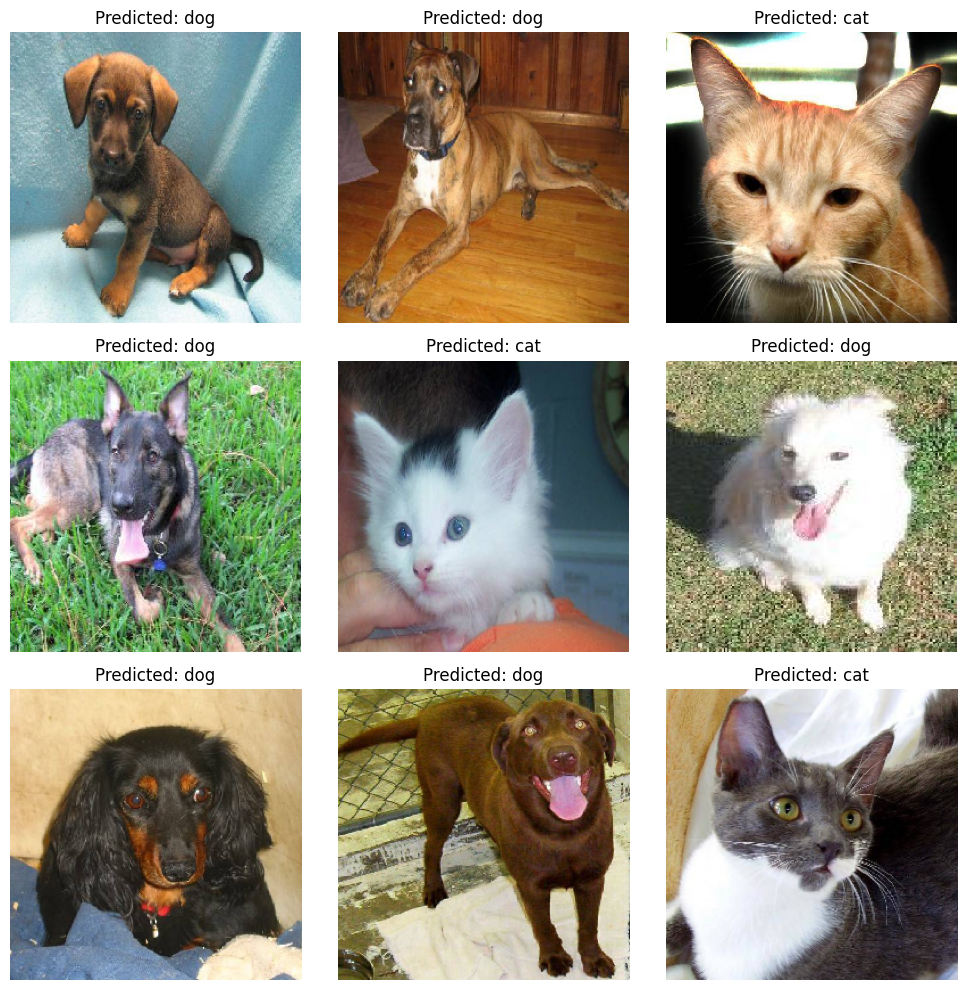

In [6]:
pred = pred > 0.5
pred_label = ['dog' if p==1 else 'cat' for p in pred]
print(pred_label[:10])

# plot 9 images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_generator[0][i])
    plt.title('Predicted: ' + pred_label[i])
    plt.axis('off')
plt.tight_layout()

In [8]:
# Оцінка ефективності моделі на тестовому наборі
predictions = model.predict(test_generator)
predicted_labels = np.squeeze(predictions).astype(int)

# Завантаження справжніх міток
true_labels = np.zeros(len(test_generator.filenames))
for i, filename in enumerate(test_generator.filenames):
    if 'cat' in filename:
        true_labels[i] = 0
    elif 'dog' in filename:
        true_labels[i] = 1

# Обчислення точності
accuracy = np.mean(predicted_labels == true_labels)
print("Точність на тестовому наборі:", accuracy)

  1/196 [..............................] - ETA: 23s

2023-05-19 21:33:22.930230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


196/196 [==============================] - 15s 78ms/step
Точність на тестовому наборі: 0.89008
